In [3]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
# Step 2: Load and Prepare Data
boston = pd.read_csv('C:/Users/erica/Downloads/HousingData.csv')

In [5]:
print(boston.head())  # Display the first few rows

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [7]:
# Explore the dataset
print(boston.info())  # Check data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [8]:
print(boston.describe())  # Get summary statistics

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.999513    2.1057

In [9]:
# Step 3: Preprocess the Data (Handle missing values, encode categorical variables, etc.)
# Replace missing values with mean for numerical columns
boston.fillna(boston.mean(), inplace=True)

In [10]:
# Step 4: Feature Selection/Engineering
# Drop unnecessary columns
boston.drop(['CHAS', 'RAD'], axis=1, inplace=True)

In [11]:
# Step 5: Split Data into Train and Test Sets
X = boston.drop('MEDV', axis=1)
y = boston['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Step 6: Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Step 7: Predict on Test Data and Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 27.42153522176371


In [15]:
# Step 8: Display Coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nModel Coefficients:")
print(coefficients)


Model Coefficients:
    Feature  Coefficient
0      CRIM    -0.091973
1        ZN     0.023032
2     INDUS    -0.049168
3       NOX   -13.750063
4        RM     5.149591
5       AGE    -0.021753
6       DIS    -1.525863
7       TAX     0.000484
8   PTRATIO    -0.824289
9         B     0.012259
10    LSTAT    -0.444617


In [16]:
import matplotlib.pyplot as plt

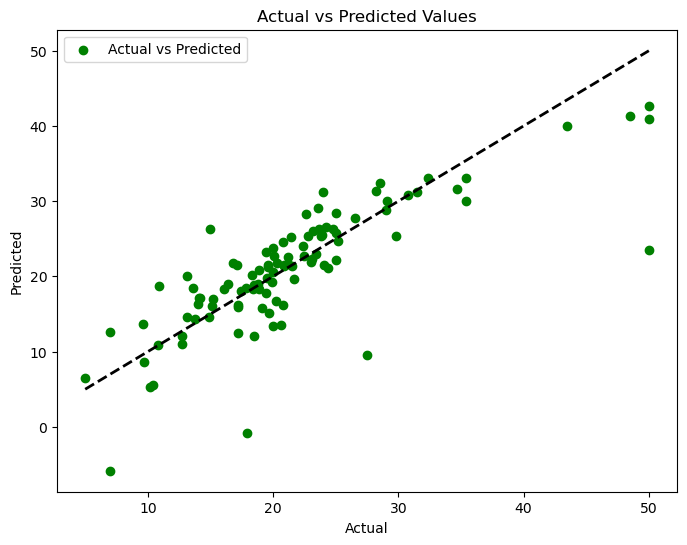

In [30]:
# Scatter plot of actual vs predicted values with custom colors
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

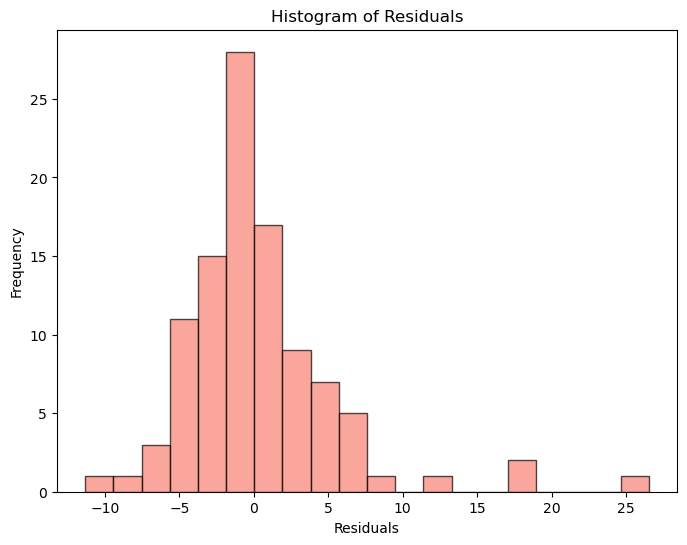

In [31]:
# Histogram of residuals with custom color and border
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, color='salmon', alpha=0.7, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

The steps involved in building and evaluating a linear regression model:

**Data Loading and Preprocessing:**
Load the dataset.
Explore the dataset to understand its structure, missing values, and summary statistics.
Handle any missing or inconsistent data, such as imputing missing values or removing outliers.

**Feature Selection:**
Select relevant features that are likely to influence the target variable.
Split the dataset into features (independent variables) and the target variable (dependent variable).

**Model Training:**
Split the dataset into training and testing sets.
Initialize the linear regression model.
Fit the model to the training data to learn the relationships between features and the target variable.

**Model Evaluation:**
Predict the target variable using the trained model on the testing set.
Evaluate the performance of the model using metrics such as mean squared error (MSE), R-squared, or others depending on the problem.

**Visualization:**
Visualize the relationship between the actual and predicted values using scatter plots.
Visualize the distribution of residuals using histograms to assess the model's performance.